## kNN for classification

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

In [3]:
glass = pd.read_csv("glassClass.csv")

glass.head(7)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1


In [4]:
Y = glass["Type"]  # response

X = glass.drop("Type", axis=1)  # predictors

In [5]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((171, 9), (43, 9), (171,), (43,))

In [6]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

In [7]:
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# predict the response
Y_pred = knn.predict(X_test)

Y_pred[0]

1

In [9]:
confusion_matrix = confusion_matrix(y_test, Y_pred)
confusion_matrix

array([[ 9,  2,  1,  0,  0,  0],
       [ 5, 13,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  6]])

In [10]:
print(accuracy_score(y_test, Y_pred))

0.7209302325581395


## Parameter tuning with cross-validation

In [11]:
# creating  list of K/neighbours for KNN
myList = list(range(1, 50))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


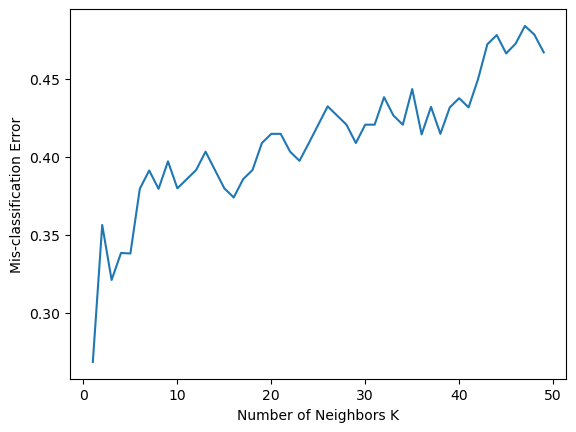

In [12]:
# Changing to mis-classification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot mis-classification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mis-classification Error')
plt.show()
